In [2]:
import numpy as np
import os
SHOGUN_DATA_DIR=os.getenv('SHOGUN_DATA_DIR', '../../../data')
from scipy.io import wavfile
from scipy.signal import resample

def load_wav(filename,samplerate=44100):
    
    # load file
    rate, data = wavfile.read(filename)

    # convert stereo to mono
    if len(data.shape) > 1:
        data = data[:,0]/2 + data[:,1]/2

    # re-interpolate samplerate    
    ratio = float(samplerate) / float(rate)
    data = resample(data, int(len(data) * ratio))
    
    return samplerate, data.astype(np.int16)

In [3]:
from IPython.display import Audio
from IPython.display import display
def wavPlayer(data, rate):
    display(Audio(data, rate=rate))

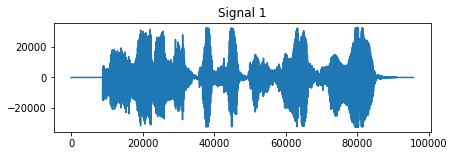

In [4]:
%matplotlib inline
import pylab as pl

# load
fs1,s1 = load_wav('wav//female//2-01.wav') # Terran Battlecruiser - "Good day, commander."

# plot
pl.figure(figsize=(6.75,2))
pl.plot(s1)
pl.title('Signal 1')
pl.show()

# player
wavPlayer(s1, fs1)

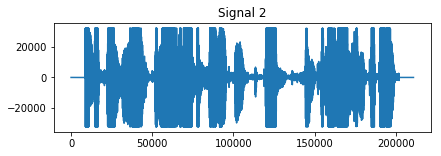

In [5]:
# load
fs2,s2 = load_wav('wav//female//8-1.wav') # Terran Marine - "You want a piece of me, boy?"

# plot
pl.figure(figsize=(6.75,2))
pl.plot(s2)
pl.title('Signal 2')
pl.show()

# player
wavPlayer(s2, fs2)

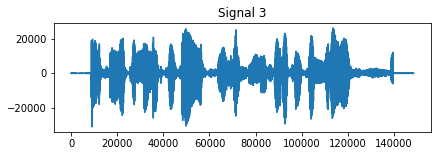

In [6]:
# load
fs3,s3 = load_wav('wav//female//5-03.wav') # Protoss Zealot - "My life for Aiur!"

# plot
pl.figure(figsize=(6.75,2))
pl.plot(s3)
pl.title('Signal 3')
pl.show()

# player
wavPlayer(s3, fs3)

Mixing Matrix:
[[ 1.   0.5  0.5]
 [ 0.5  1.   0.5]
 [ 0.5  0.5  1. ]]


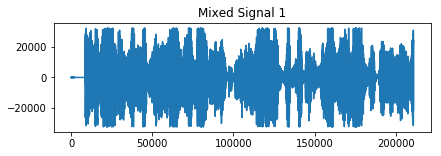

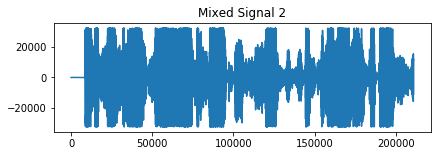

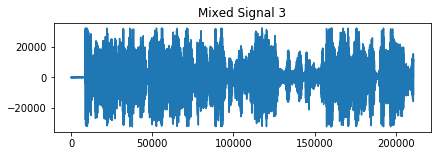

In [7]:
# Adjust for different clip lengths
fs = fs1
length = max([len(s1), len(s2), len(s3)])
s1 = np.resize(s1, (length,1))
s2 = np.resize(s2, (length,1))
s3 = np.resize(s3, (length,1))

S = (np.c_[s1, s2, s3]).T

# Mixing Matrix
#A = np.random.uniform(size=(3,3))
#A = A / A.sum(axis=0)
A = np.array([[1, 0.5, 0.5],
              [0.5, 1, 0.5], 
              [0.5, 0.5, 1]]) 
print('Mixing Matrix:')
print(A.round(2))

# Mix Signals
X = np.dot(A,S)

# Mixed Signal i
for i in range(X.shape[0]):
    pl.figure(figsize=(6.75,2))
    pl.plot((X[i]).astype(np.int16))
    pl.title('Mixed Signal %d' % (i+1))
    pl.show()
    wavPlayer((X[i]).astype(np.int16), fs)

In [19]:
from shogun import RealFeatures


# Convert to features for shogun
mixed_signals = RealFeatures((X).astype(np.float64))

In [22]:
from shogun import Jade
# Separating with JADE
jade = Jade()
signals = jade.apply(mixed_signals)

S_ = signals.get_feature_matrix()

A_ = jade.get_mixing_matrix()
A_ = A_ / A_.sum(axis=0)

print ('Estimated Mixing Matrix:')
print (A_)


Estimated Mixing Matrix:
[[  9.99999358e-01  -1.39541624e-07  -5.02149650e-07]
 [  1.39541518e-07   1.00000014e+00   3.79531833e-09]
 [  5.02149077e-07  -3.79539139e-09   1.00000050e+00]]


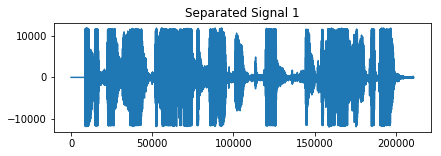

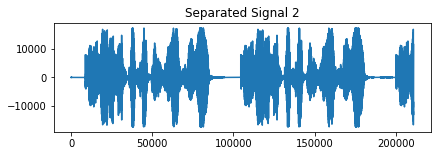

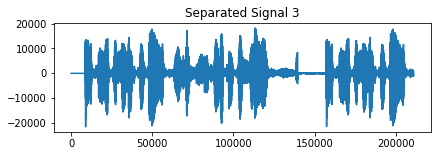

In [23]:
# Show separation results

# Separated Signal i
gain = 4000
for i in range(S_.shape[0]):
    pl.figure(figsize=(6.75,2))
    pl.plot((gain*S_[i]).astype(np.int16))
    pl.title('Separated Signal %d' % (i+1))
    pl.show()
    wavPlayer((gain*S_[i]).astype(np.int16), fs)